In [2]:
!pip install opencv-python

     |████████████████████████████████| 28.7MB 243kB/s eta 0:00:01
You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
import cv2

# Para ocupar opencv

In [5]:
camera = cv2.VideoCapture(0)
for i in range(100):
    return_value, image = camera.read()
    cv2.imwrite('images/opencv'+str(i)+'.png', image)
del(camera)

In [3]:
import numpy as np
from scipy import signal as sg
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline # if you are running this code in jupyter notebook

UsageError: unrecognized arguments: # if you are running this code in jupyter notebook


In [4]:
img = cv2.imread("images/opencv29.png") # reads image as BGR

(array([  202.,   188.,   411.,  1384.,  4858., 10201., 14937., 12696.,
        13443., 11953., 12426., 10328., 11311., 13431., 14473., 13660.,
        12418., 10861., 10431., 10686., 13381., 10237.,  9191.,  7639.,
         6392.,  4700.,  3917.,  3298.,  3359.,  3361.,  4437.,  3542.,
         2716.,  2831.,  2157.,  1765.,  1564.,  1484.,  1355.,  1278.,
         1543.,  1346.,  1091.,  1026.,   877.,   756.,   935.,   751.,
          828., 19145.]),
 array([  0. ,   5.1,  10.2,  15.3,  20.4,  25.5,  30.6,  35.7,  40.8,
         45.9,  51. ,  56.1,  61.2,  66.3,  71.4,  76.5,  81.6,  86.7,
         91.8,  96.9, 102. , 107.1, 112.2, 117.3, 122.4, 127.5, 132.6,
        137.7, 142.8, 147.9, 153. , 158.1, 163.2, 168.3, 173.4, 178.5,
        183.6, 188.7, 193.8, 198.9, 204. , 209.1, 214.2, 219.3, 224.4,
        229.5, 234.6, 239.7, 244.8, 249.9, 255. ]),
 <a list of 50 Patch objects>)

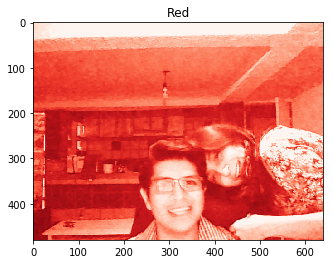

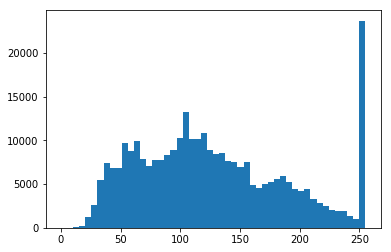

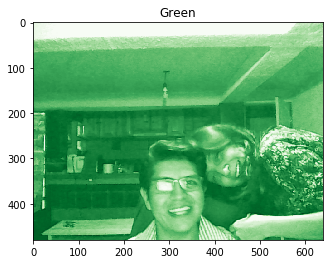

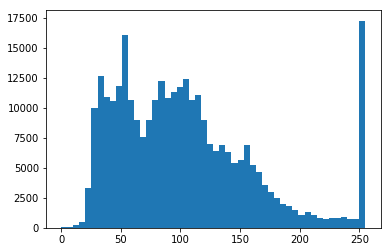

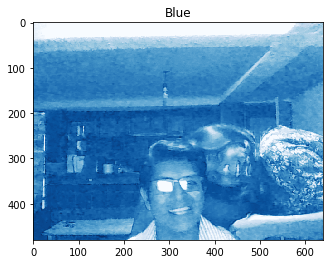

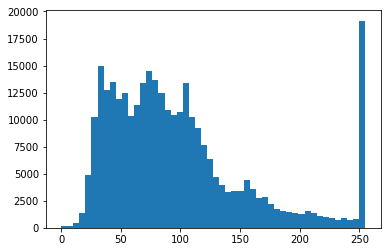

In [14]:
plt.figure()
plt.imshow(img[:, :, 2], cmap="Reds_r")
plt.title("Red")
plt.figure()
plt.hist(img[:, :, 2].ravel(), bins=50)
plt.figure()
plt.imshow(img[:, :, 1], cmap="Greens_r")
plt.title("Green")
plt.figure()
plt.hist(img[:, :, 1].ravel(), bins=50)
plt.figure()
plt.imshow(img[:, :, 0], cmap=plt.cm.Blues_r)
plt.title("Blue")
plt.figure()
plt.hist(img[:, :, 0].ravel(), bins=50)

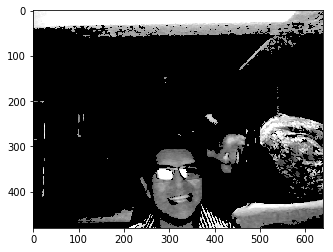

In [26]:
mask = img[:, :, 2] > 175
plt.imshow(img[:, :, 0]*mask, cmap=plt.cm.gray)

In [5]:
img = cv2.imread("images/opencv29.png", 0) # reads image as grayscale

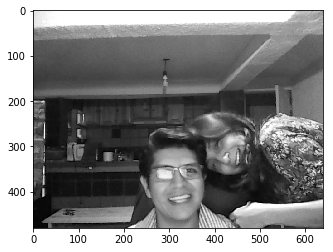

In [6]:
plt.imshow(img, cmap=plt.cm.gray)

# Convolucion

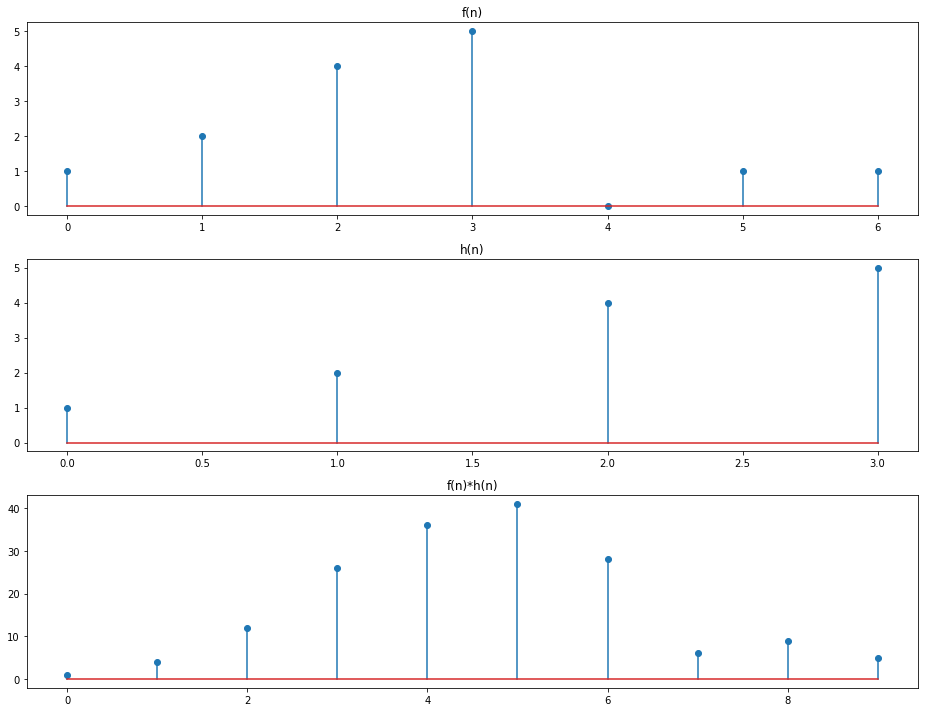

In [7]:
def conv1d(fl, kl):
    m = len(fl)
    n = len(kl)
    filtermat = np.zeros((m+n-1, m))
    for c in range(m):
        filtermat[c:n+c,c] = kl
    convolucion = np.matmul(filtermat, fl)
    return convolucion

f = [1,2,4,5,0,1,1]
h = [1,2,4,5]
plt.figure(figsize=(13,10))
plt.subplot(3,1,1)
plt.stem(f)
plt.title("f(n)")
plt.subplot(3,1,2)
plt.stem(h)
plt.title("h(n)")
plt.subplot(3,1,3)
plt.stem(conv1d(f, h))
plt.title("f(n)*h(n)")
plt.tight_layout()

# Convolucion en 2d

Dadas la matrices de a continuacion:

$$\frac{1}{9} \left[\begin{matrix}1 & 1 & 1 \\1 & 1 & 1\\1 & 1 & 1\end{matrix}\right]$$

$$\frac{1}{25} \left[\begin{matrix}1 & 1 & 1 & 1 & 1 \\1 & 1 & 1 & 1 & 1\\1 & 1 & 1 & 1 & 1\\1 & 1 & 1 & 1 & 1\end{matrix}\right]$$

$$\frac{1}{16} \left[\begin{matrix}1 & 2 & 1 \\2 & 4 & 2\\1 & 2 & 1\end{matrix}\right]$$

hacer la convolucion de las matrices con la matriz imagen y evaluar los resultados

In [8]:
kernel = np.ones(shape=(3,3), dtype=float) * (1/9)

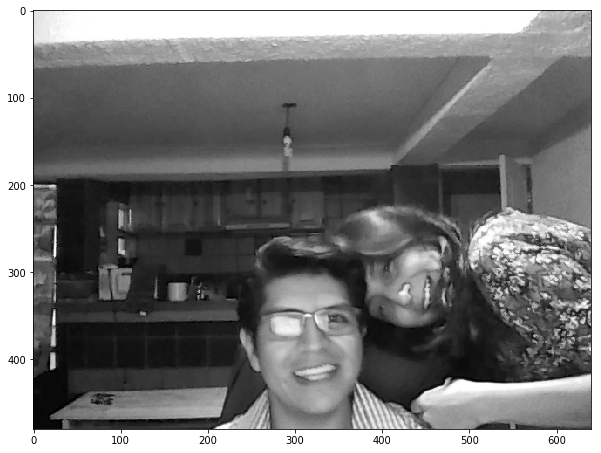

In [9]:
plt.figure(figsize=(10, 10))
plt.imshow(img, cmap=plt.cm.gray)

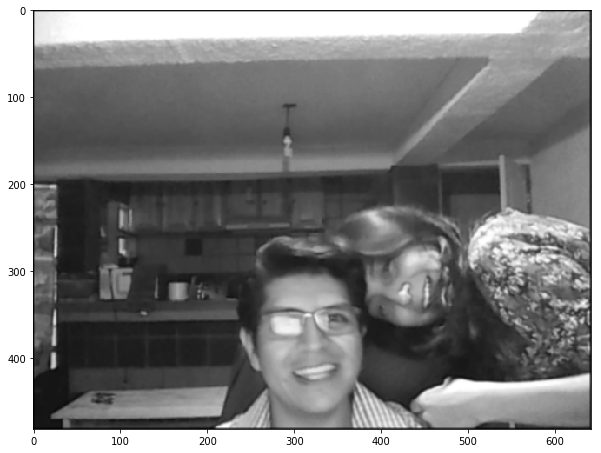

In [10]:
plt.figure(figsize=(10, 10))
plt.imshow(sg.convolve2d(img, kernel), cmap=plt.cm.gray)

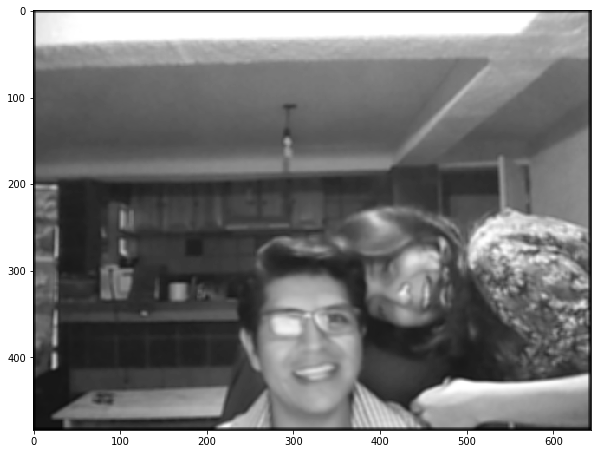

In [11]:
kernel2 = np.ones(shape=(5, 5), dtype=float) * (1/25)
plt.figure(figsize=(10, 10))
plt.imshow(sg.convolve2d(img, kernel2), cmap=plt.cm.gray)

In [12]:
kernel3 = np.array([1,2,1,2,4,2,1,2,1]).reshape(3,-1)*(1/16)
kernel3

array([[0.0625, 0.125 , 0.0625],
       [0.125 , 0.25  , 0.125 ],
       [0.0625, 0.125 , 0.0625]])

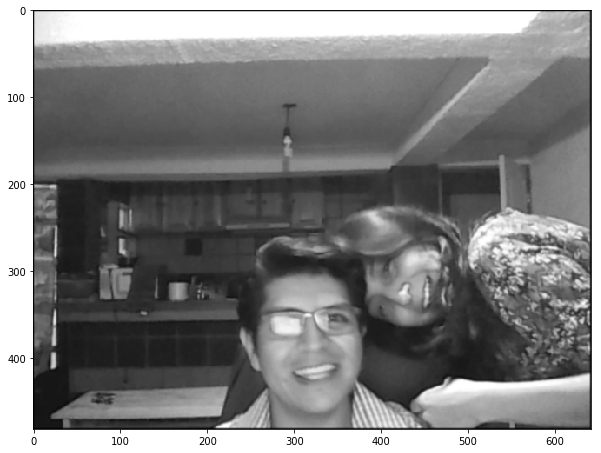

In [13]:
plt.figure(figsize=(10, 10))
plt.imshow(sg.convolve2d(img, kernel3), cmap=plt.cm.gray)

In [14]:
cv2.imshow("Lotus", sg.convolve2d(img, kernel3).astype(np.int8))

# Filtros

In [ ]:
filterarray = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]])

In [16]:
filterarray = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]])

In [11]:
from scipy import signal as sg

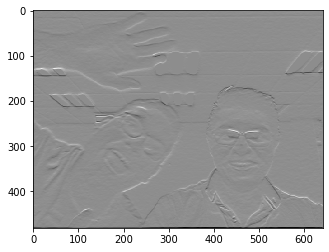

In [18]:
plt.imshow(sg.convolve(filterarray, img[:,:,0]), cmap="gray")

# Sobre filtros

- https://www.opencv-srf.com/2018/01/filter-images-and-videos.html
- http://juanreyero.com/article/python/python-convolution.html
- https://www.pyimagesearch.com/2016/07/25/convolutions-with-opencv-and-python/

# Scikit Image

- https://scikit-image.org/docs/stable/auto_examples/index.html

# OpenCV

- https://docs.opencv.org/master/d9/df8/tutorial_root.html
- Para instalar: https://pypi.org/project/opencv-python/